Yannick Brasser (641182)


Assignment Applied Economic Analysis 1

# Research question

### Question: What is the effect of wages on the number of conceded goals in a soccer competition?

I consider this question interesting in the first place as a soccer fan, player and coach. I am aware of the fact that in modern day soccer, most of the results are affected by money. It is easy to picture how this relationship goes: the richest clubs can buy the best strikers, making the goals necessary to win games and yet trophies, and playmakers, creating the chances these strikers need to score these important goals. Playmakers and strikers are the most remarkable and eye-catching players. Their contribution to the game is visible with the naked eye.

But, in contradiction to playmakers and defenders, the contribution of the goalkeeper and defenders is not directly visible to the untrained eye. Defenders make a living out of preventing other strikers to score rather scoring or facilitating goals themselves. It takes more effort to clubs to differentiate good defenders from bad ones than it takes to differ between good and bad strikers or playmakers. Are the clubs doing a good job in finding the best defenders? To make a first step to answer this question, I will develop a model, in which I estimate the effect of higher wages on the number of goals soccer teams concede. 

# Method

I use a dataset I constructed myself for my thesis, which I am finishing at this very moment. The data contains several variables, like the wage sum, number of red cards, yellow cards and injuries. Injuries are measured in days lost to injury, so if 3 players are injured on the same day, that day counts for three. 

In order to calculate the effect of playing minutes concentration on performance, I use a simple lineair regression, with the Wages as an independent variable, number of conceded goals as a dependent variable and some control variables. In this model, I control for yellow cards, red cards and number of competitive games.

Summarizing, my model will look like this:

(1)\begin{equation} GOALSCONCEDED_{it}=\alpha + \beta * Wages_{it} + \gamma * Injuries_{it} + \delta_{1} * Yellow_{it} + \delta_{2} * Red_{it} + \epsilon_{it}\end{equation}

# Assumptions

In order to make this model work, I make a few simple assumptions:

#### 1) The number of goals conceded is a precise measure for the defending performance of a team.
In this model I want to measure the effect of wages on the defensive performance rather than offensive. In order to do so, I need a accurate and precise estimator of defensive performance. Ideally I would use Expected Goal Against-data, which measures the forecasted number of goals conceded based on the quality of the chances a team concedes. Because these data are merely unavailable before 2015, I use the real number of goals conceded. These data are easy to collect, but at the same time less precise, because bad defending teams can still have a relatively low number of goals conceded and good defending teams can still have a relatively high number of goals conceded. This is because the number of goals conceded not only depends on the quality of the defense, but also on the quality of the completion of these chances by the opponent. This is a matter of goal scoring capacities and of course (bad) luck. So the xGoalConceded-data are difficult to get but at the same time more accurate compared to real goals conceded. I nevertheless assume that real goals conceded is a good estimation. The assumption behind is that in a dataset of this size, 160 datapoints, luck and bad luck are close to randomly distributed between teams.
#### 2) Every day of injury hurts a team equally
I measure injuries, as mentioned before, in Days lost to Injuries. That means that a day lost to an injury of a particular player counts as score 1. But in reality, not every injury counts as one. Sometimes, the team has a close-to-equal substitute player on the bench, sometimes a player is hardly replacable. The better a player, the more an injury can hurt the team's performance. Yet in this measure, all injury have the same weight. The assumption behind is again that in a dataset of this size, 160 datapoints, the severity of injury days is normally distributed.
#### 3) Every red card hurts a team equally
For point 3 holds the same as for 2), but red cards can lead to suspensions of at max 5 matches (very few occassions of larger suspensions are included in the dataset). Injuries can take a whole season. The total effect of red cards is therefore expected to be much smaller that of injuries. 
#### 4) Every yellow card hurts a team equally
Because I just measure the number of yellow cards, every card puts an equal weight on the defensive performance. But not all cards have the same value to a team. A second yellow in one match can affect result more than other yellow cards, just as the card that creates a suspension for a player. Because these data are not available, I just use the number of yellow cards.

## Data

In [3]:
import pandas as pd #pandas is necessary to read the data I use

In [4]:
df = pd.read_csv('Data2-4.xlsx - Copy of Final data table-2.csv') #this is a file on my own computer, so unfortunately it is not publicly available

As I said, I will use a dataset I created for my master thesis. The dataset contains Opta-data on 8 years of the English Premier League, as obtained from [WhoScored](https://www.whoscored.com). I added data on injuries, which were obtained from [PhysioRoom](https://www.physioroom.com).

In [5]:
df #this the raw dataset

,Season,Club_Name,Rank,Points,Goals,Goals_Conceded,Yellow,Red,Injuries,Wages
0,2009-2010,Arsenal,3,75,83,41,56,1,1868,110
1,2009-2010,Aston_Villa,6,64,52,39,59,2,528,80
2,2009-2010,Birmingham,9,50,38,47,74,1,1331,38
3,2009-2010,Blackburn,10,50,41,55,57,2,689,47
4,2009-2010,Bolton,14,39,42,67,74,5,1231,46
5,2009-2010,Burnley,18,30,42,82,57,2,912,22
6,2009-2010,Chelsea,1,86,103,32,54,5,1077,174
7,2009-2010,Everton,8,61,60,49,57,2,1046,54
8,2009-2010,Fulham,12,46,39,46,46,1,1089,49
9,2009-2010,Hull,19,30,34,75,64,6,842,38


In [6]:
df.dtypes #this is a list of all data and their types. All variables are of type int64, except for Club_Name and Season

Season            object
Club_Name         object
Rank               int64
Points             int64
Goals              int64
Goals_Conceded     int64
Yellow             int64
Red                int64
Injuries           int64
Wages              int64
dtype: object

In [7]:
from scipy.stats import trim_mean, kurtosis
from scipy.stats.mstats import mode, gmean, hmean #I use these packages to make some descriptives before I run the regression

In [8]:
df.describe()

,Rank,Points,Goals,Goals_Conceded,Yellow,Red,Injuries,Wages
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,10.500000,52.187500,52.262500,52.437500,62.012500,2.968750,1054.650000,90.681250
std,5.784386,16.892255,16.143806,13.018462,9.775459,1.854527,413.537496,55.798647
min,1.000000,17.000000,27.000000,26.000000,40.000000,0.000000,186.000000,22.000000
25%,5.750000,40.000000,41.000000,43.000000,55.000000,2.000000,791.000000,54.000000
50%,10.500000,47.000000,48.000000,51.000000,62.000000,3.000000,1019.500000,68.500000
75%,15.250000,64.250000,61.250000,61.250000,68.000000,4.000000,1287.500000,112.250000
max,20.000000,93.000000,103.000000,85.000000,94.000000,9.000000,2289.000000,233.000000


In this assignment, I focus on Goals Conceded. This variable is on average 52.4375 in this sample. An average Premier League team in this sample gets 62 yellow cards and almost three red ones. An astonishing average of 1054.65 days (!) is lost per team every season on injuries. The average wage sum is £90,681,125.

In [17]:
from ggplot import * #I import this to create scatter plots in order to discover the data.

In [10]:
df = pd.DataFrame(df, columns=["Goals_Conceded","Points","Yellow","Red","Injuries","Wages"])

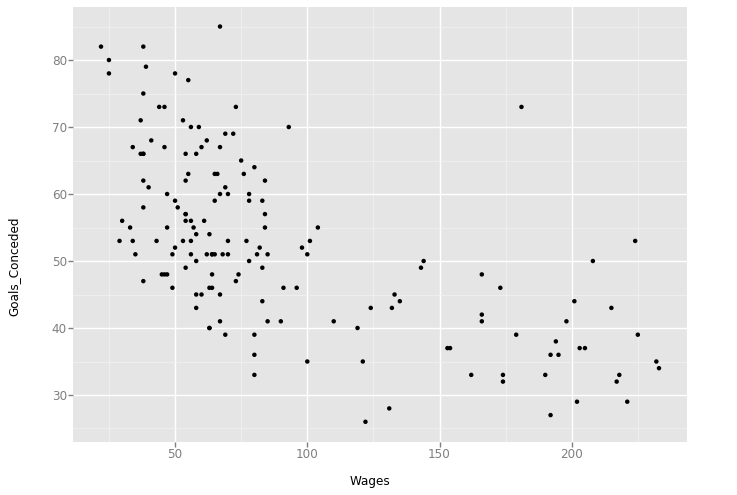

<ggplot: (283710973)>


In [11]:
print ggplot(df, aes('Wages', 'Goals_Conceded')) + geom_point(colour='steelblue')

I see that there is a strong, negative relationship between wages and Goals_Conceded. The points in the dotplot suggests a lineair correlation.

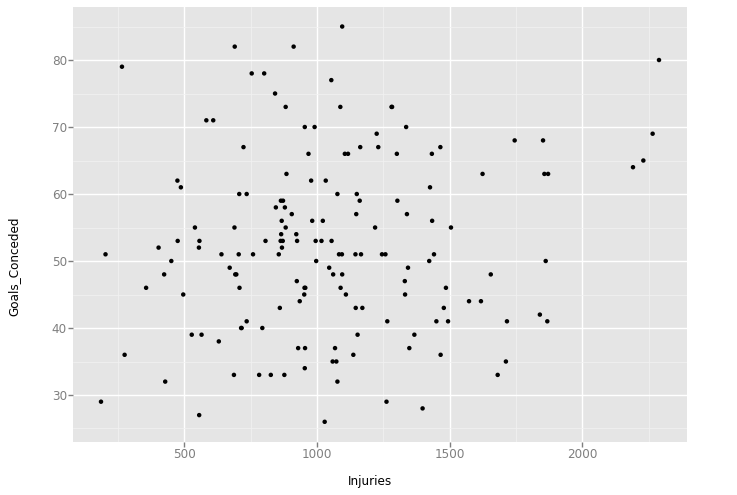

<ggplot: (272354913)>


In [12]:
print ggplot(df, aes('Injuries', 'Goals_Conceded')) + geom_point(colour='steelblue')

This is not a plot like the first one, but there seems to be some correlation between Goals_Conceded and injuries. If we could filter only the defensive injuries, things would become clear.

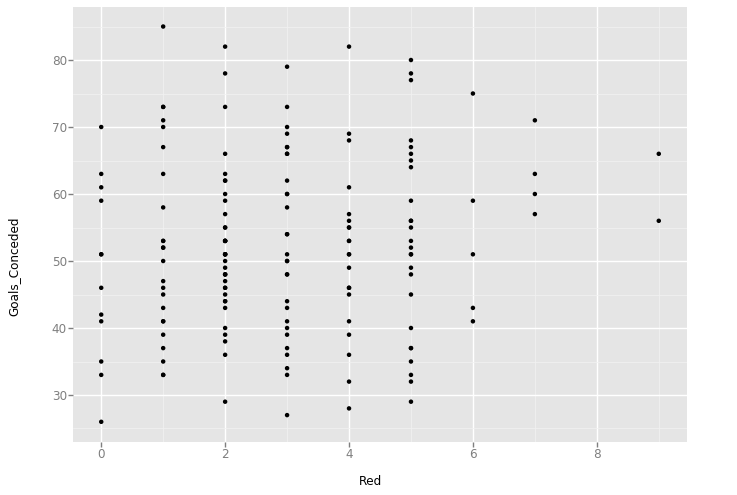

<ggplot: (284552893)>


In [13]:
print ggplot(df, aes('Red', 'Goals_Conceded')) + geom_point(colour='steelblue')

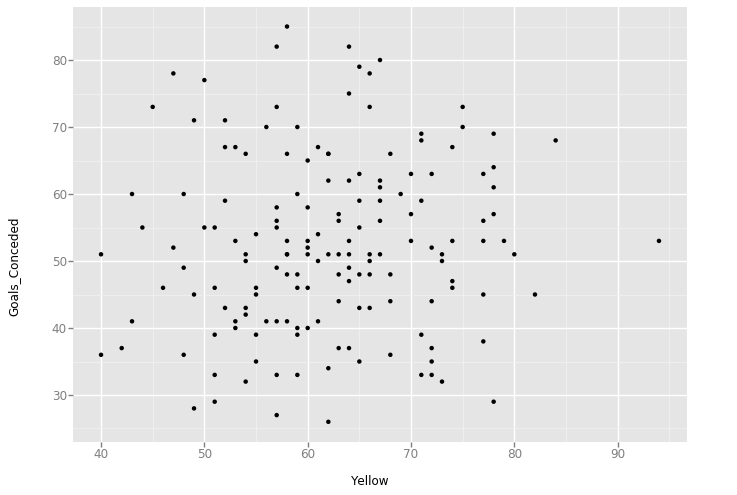

<ggplot: (284640065)>


In [14]:
print ggplot(df, aes('Yellow', 'Goals_Conceded')) + geom_point(colour='steelblue')

The scatterplots of the correlation between Yellow and Goals_Conceded and Red and Goals_Conceded show a rather weak correlation. The correlation with Red is very uneasy to see, because Red can take a limited range of values. In Yellow there seems to be some correlation, which would be positive.

# Results

In [15]:
import statsmodels.formula.api as smf

In [16]:
mod = smf.ols(formula='Goals_Conceded ~ Wages + Injuries + Yellow + Red', data=df) #I want to run a regression with Goals_Conceded as a Dependent Variable and Wages, Yellow, Red and Injuries as Independent Variables.
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:         Goals_Conceded   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     30.55
Date:                Tue, 23 Jan 2018   Prob (F-statistic):           9.54e-19
Time:                        16:04:16   Log-Likelihood:                -590.64
No. Observations:                 160   AIC:                             1191.
Df Residuals:                     155   BIC:                             1207.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     52.2543      5.526      9.457      0.0

Finally, the result of the regression of this assignment. 44.1% of variation in Goals_Conceded can be determined by the model. Most of this variation will be explained by Wages I expect. The model as a whole is significant with high significance levels. Only Yellow and Red are not significant with p smaller than 0.05. The p's however have a relatively low p as well. Wages are very significant and therefore strongly correlated with Goals_Conceded. Summarizing, this model is useful to estimate Goals_Conceded.

# Conclusion & Discussion

As we derive from the results, there is a strong, negative correlation between wages and conceded goals. Rich teams tend to have better defensive performances. Even if we take into account injuries and suspensions, the effect is very strong. Not only do rich teams make an effort to sign the best offensive players, they also scout the better defensive players, in order to prevent their opponents from scoring goals.

The model we use therefore becomes like this:

\begin{equation} GOALSCONCEDED_{it}=52.25 - 0.15 * Wages_{it} + 0.005 * Injuries_{it} + 0.11 * Yellow_{it} + 0.68 * Red_{it} + \epsilon_{it}\end{equation}

This is an important finding of the paper, but we have to be careful in interpreting this result. In this regression, I tried to show the correlation between wages and conceded goals, as seen in the results section. However, correlation is no causation. What we have learned from this assignment is that rich clubs have better defenses. But is it that clubs perform better defensively because they have more money or the other way around? This question cannot be answered by the data provided in this assignment. More accurate data are needed to find out the direction of the relation.

There are other limitations as well. I firstly have to admit that the injury data are far from accurate. The data tell us how many days are lost in injuries. But an injury of the substitute striker will harm defensive performance not as much as a main defender's injury will. In the data, both count as much as each other. More accurate data would make the real effect clear or at least a preciser estimation.

The same holds for data on red and yellow cards. A red card in the first minute impacts the number of conceded goals more than a red card in the last minute. This effect is not taken into account when taking just the number of cards. Therefore, again, when investigating this subject further, more accurate data could be used to better estimate the effect of a red or yellow card.  

Summarizing, we cannot conclude from this limited dataset that richer clubs perform as well on buying defenders as they do on buying playmakers/strikers, but the outcome suggests that rich clubs tend to perform better at preventing their opponents of scoring goals. In order to confirm this result, more research is necessary.